<a href="https://colab.research.google.com/github/RafaSFernandes/tcchtmlK/blob/main/Desafio05_RafaelFernandes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Escola DNC

Desafio prático

Matéria 8: Data Cleaning and Wrangling

Organizando e analisando dados de um Airbnb

Aluno: Rafael Souza Fernandes

#1.Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#2.Carregando os dados

##2.1.Importando dados

In [2]:
#Montagem do drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Caminho da pasta dos arquivos
path = "/content/drive/MyDrive/Datasets_Modulos/Desafio_05/"

In [4]:
#Leitura dos arquivos
df_listings = pd.read_csv(path + "listings_cleaned.csv")
df_reviews = pd.read_csv(path + "reviews.csv")

##2.2.Inspeção dos dados

###2.2.1. df_listings

In [5]:
#Primeiras linhas
df_listings.head()

,id,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,price
0,271975,Vidigal,Entire home/apt,4,1.0,2.0,2.0,236.0
1,272335,Copacabana,Entire home/apt,4,1.0,1.0,1.0,723.0
2,272631,Copacabana,Private room,2,1.0,1.0,2.0,1146.0
3,273261,Leblon,Entire home/apt,6,3.5,3.0,3.0,6742.0
4,273363,Santa Teresa,Private room,1,1.0,1.0,1.0,61.0


In [6]:
#Dimensões
df_listings.shape

(39499, 8)

In [7]:
#Tipos de dados
df_listings.dtypes

,0
id,int64
neighbourhood_cleansed,object
room_type,object
accommodates,int64
bathrooms,float64
bedrooms,float64
beds,float64
price,float64


###2.2.2. df_reviews

In [8]:
#Primeiras linhas
df_reviews.head()

,id,number_of_reviews,review_scores_rating
0,272335,367,4.92
1,272631,32,5.00
2,273363,5,5.00
3,273463,654,4.83
4,273496,60,4.80


In [9]:
#Dimensões
df_reviews.shape

(32695, 3)

In [10]:
#Tipos de dados
df_reviews.dtypes

,0
id,int64
number_of_reviews,int64
review_scores_rating,float64


##2.3.União dos DataFrames

In [11]:
#União dos dados
df_main = pd.merge(df_listings, df_reviews, how='left', on='id')
pipe_test = df_main

In [12]:
df_main.shape

(39499, 10)

In [13]:
df_main.head()

,id,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating
0,271975,Vidigal,Entire home/apt,4,1.0,2.0,2.0,236.0,NaN,NaN
1,272335,Copacabana,Entire home/apt,4,1.0,1.0,1.0,723.0,367.0,4.920000
2,272631,Copacabana,Private room,2,1.0,1.0,2.0,1146.0,32.0,5.000000
3,273261,Leblon,Entire home/apt,6,3.5,3.0,3.0,6742.0,0.0,4.812309
4,273363,Santa Teresa,Private room,1,1.0,1.0,1.0,61.0,5.0,5.000000


#3.Limpeza e Tratamento de Dados

##3.1.Valores nulos

###3.1.1.Identificação

In [14]:
#Verificando porcentagem de dados nulos em cada coluna
(df_main.isnull().sum() / df_main.shape[0] * 100).sort_values(ascending=False)

,0
review_scores_rating,17.225753
number_of_reviews,17.225753
bathrooms,7.316641
beds,7.263475
price,7.228031
bedrooms,1.324084
neighbourhood_cleansed,0.000000
id,0.000000
room_type,0.000000
accommodates,0.000000


###3.1.2.Tratamento

####3.1.2.1.Comparações

In [15]:
#Comparando o percentual de alterações nas estatíscas com remoção dos dados nulos
abs((df_main.dropna().describe() - df_main.describe()))/df_main.describe()*100

,id,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating
count,17.225753,17.225753,10.691360,16.115045,10.742561,10.776662,0.0,0.0
mean,2.273312,6.184420,8.329873,8.271755,7.187822,36.194285,0.0,0.0
std,0.422670,14.746411,23.983841,14.644074,15.017995,86.133657,0.0,0.0
min,0.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN
25%,2.989433,0.000000,0.000000,0.000000,0.000000,3.500000,0.0,0.0
50%,3.264366,0.000000,0.000000,0.000000,0.000000,7.829670,0.0,0.0
75%,0.622694,20.000000,0.000000,0.000000,0.000000,13.666667,0.0,0.0
max,0.000000,0.000000,0.000000,13.333333,10.714286,98.000000,0.0,0.0


In [16]:
#Seleção de colunas com dados numéricos
df_main_num = df_main.select_dtypes(include='number').columns

In [17]:
#Comparando o percentual de alterações nas estatíscas com substituição dos dados nulos pela mediana
abs(df_main.fillna(df_main[df_main_num].median()).describe() - df_main.describe())/df_main.describe()*100

,id,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating
count,0.0,0.0,7.894234,1.341851,7.832378,7.791180,20.810521,20.810521
mean,0.0,0.0,2.492817,0.467101,1.120934,2.939942,12.942888,0.049552
std,0.0,0.0,2.732083,0.476784,3.581294,3.620793,7.830500,9.002766
min,0.0,0.0,NaN,NaN,NaN,0.000000,NaN,NaN
25%,0.0,0.0,0.000000,0.000000,0.000000,7.250000,0.000000,0.000000
50%,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.0,0.000000,0.000000,0.000000,3.083333,23.076923,0.600000
max,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


####3.1.2.2.Análise


Comparando a remoção de valores nulos (`.dropna()`) com a substituição de nulos pela mediana (`.fillna()`) percebemos que há impactos na base de dados.

A **remoção dos dados** impacta significativamente na coluna de `price`, cerca de 36% na sua média e 86% no desvio padrão.

A **substituição dos dados pela mediana** impacta em:

 `number_of_rewiews` (13% na média e 8% em desvio padrão)

 `review_scores_rating` (0,4% na média e 9% em desvio padrão)

Por ter impacto menor, o método de tratamento de valores nulos será o da **substiruição pela mediana**.

####3.1.2.3.Substituição de valores nulos

In [18]:
#Substituição pela mediana
df_main.fillna(df_main[df_main_num].median(), inplace=True)

##3.2.Incoerências

###3.2.1.Valores não inteiros

In [19]:
df_main.dtypes

,0
id,int64
neighbourhood_cleansed,object
room_type,object
accommodates,int64
bathrooms,float64
bedrooms,float64
beds,float64
price,float64
number_of_reviews,float64
review_scores_rating,float64


Presença de variáveis que deveriam ser inteiras nas colunas `bathrooms`, `bedrooms`, `beds` e `number_of_reviews`.
A coluna `bathrooms` é a única que apresenta inconsistência, pois alguns valores não são inteiros.

In [20]:
#Colunas que devem possuir valores inteiros
cols_int = ['bathrooms', 'bedrooms', 'beds', 'number_of_reviews']

In [21]:
#Porcentagem de valores não inteiros na coluna bathrooms
(df_main[cols_int] - df_main[cols_int].astype(int)).value_counts(normalize=True)*100

,,,,proportion
bathrooms,bedrooms,beds,number_of_reviews,
0.0,0.0,0.0,0.0,89.794678
0.5,0.0,0.0,0.0,10.205322


10% de valores inconsistentes na coluna bathroom

In [22]:
#Transformando para dados do tipo inteiro
df_main[cols_int] = df_main[cols_int].astype(int)

In [23]:
#Porcentagem de valores não inteiros
(df_main[cols_int] - df_main[['bathrooms', 'bedrooms', 'beds', 'number_of_reviews']].astype(int)).value_counts(normalize=True)

,,,,proportion
bathrooms,bedrooms,beds,number_of_reviews,
0,0,0,0,1.0


###3.2.2.Duplicatas

In [24]:
#Verificando presença de duplicatas
df_main.duplicated().value_counts()

,count
False,39499


Não há valores duplicados

#4.Tratando e Visualizando Outliers

In [25]:
#Armazenando colunas numéricas e categóricas
num_cols = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'number_of_reviews','review_scores_rating']
cat_cols = ['neighbourhood_cleansed', 'room_type']

In [26]:
#Estatísticas
df_main.describe()

,id,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating
count,3.949900e+04,39499.000000,39499.000000,39499.000000,39499.000000,39499.000000,39499.000000,39499.000000
mean,6.782741e+17,4.002608,1.427935,1.537836,2.338464,1191.045039,21.008709,4.818532
std,5.209778e+17,2.294602,0.914154,1.015503,1.907210,3630.553054,42.757580,0.269711
min,1.787800e+04,1.000000,0.000000,0.000000,0.000000,33.000000,0.000000,0.000000
25%,4.186596e+07,2.000000,1.000000,1.000000,1.000000,429.000000,1.000000,4.812309
50%,8.333190e+17,4.000000,1.000000,1.000000,2.000000,728.000000,6.000000,4.830000
75%,1.140745e+18,5.000000,2.000000,2.000000,3.000000,1163.000000,20.000000,4.970000
max,1.320520e+18,16.000000,20.000000,30.000000,56.000000,500000.000000,710.000000,5.000000


Chama a atenção as acomodações com 20 banheiros, 30 quartos ou 56 camas como improváveis, o que provavelmente indicam erros.

O aluguel de 500 mil a diária pode ser real, porém está muito disperso da concentração de dados.

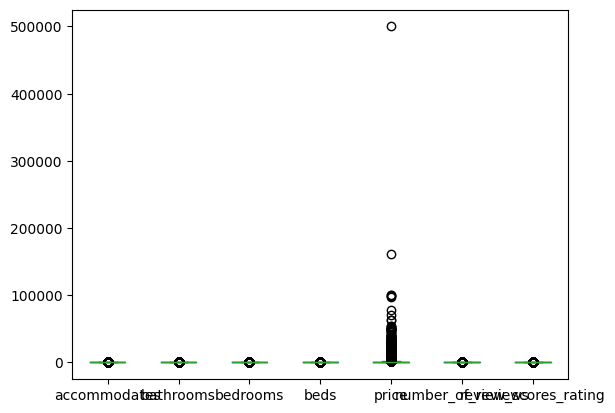

In [27]:
#Boxplot das colunas numéricas (sem 'id')
df_main[num_cols].plot(kind='box');

Notavelmente os outliers da coluna price distoam das outras colunas. Será o foco principal no tratamento.

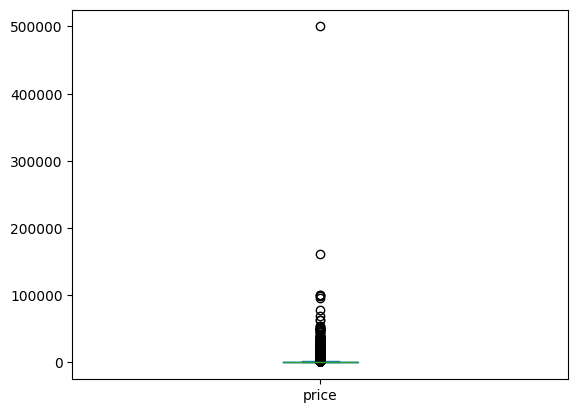

In [28]:
#Boxplot isolado da coluna 'price'
df_main['price'].plot(kind='box');

In [29]:
#Identificando outliers
outliers_cols = [] #Lista de colunas indicadoras de outliers

for col in num_cols: #Para cada coluna numérica
  Q1 = df_main[col].quantile(0.25) #Calcula o quartil 1
  Q3 = df_main[col].quantile(0.75) #Calcula o quartil 3

  IQR = Q3 - Q1 #Calcula o IQR

  LI = Q1 - 1.5*IQR #Determina o limite inferior
  LS = Q3 + 1.5*IQR #Determina o limite superior

  df_main['outliers_' + col] = ((df_main[col] < LI) | (df_main[col] > LS)) #Cria a coluna indicadora de outlier se o valor está abaixo ou acima dos limites
  outliers_cols.append('outliers_' + col) #Adiciona a coluna indicadora de outlier à lista

In [30]:
#Verificando o tamanho da base ao remover os outliers (primeira linha: 27741)
df_main[outliers_cols].value_counts()

outliers_accommodates  outliers_bathrooms  outliers_bedrooms  outliers_beds  outliers_price  outliers_number_of_reviews  outliers_review_scores_rating
False                  False               False              False          False           False                       False                            27741
                                                                                             True                        False                             4489
                                                                                             False                       True                              2409
                                                                             True            False                       False                             2076
True                   True                True               True           True            False                       False                              234
                                                                                                                                                          ...  
                       False               True               False          True            True                        False                                1
                       True                True               False          True            True                        False                                1
                                                                             False           True                        True                                 1
                                                              True           False           True                        True                                 1
                                                                             True            True                        True                                 1
Name: count, Length: 86, dtype: int64

In [31]:
#Removendo outliers
for col in outliers_cols: #Para cada coluna indicadora de outliers
  df_main = df_main[df_main[col] == False] #Filtra as linhas que não são outliers e atribui para df_main
  df_main = df_main.drop(columns=col) #Remove a coluna indicadora de outlier

In [32]:
#Conferindo a quantidade após a remoção (27741)
df_main.shape

(27741, 10)

#5.Transformando Dados Categóricos

##5.1.Análise

In [33]:
#Quantidade de dados distintos em cada coluna categórica
df_main[cat_cols].nunique()

,0
neighbourhood_cleansed,145
room_type,4


`neighbourhood_cleansed`: Com 145 valores distintos, não é válido utilizar *One-Hot Encoding*, mas também não pode ser atribuído um valor numérico por *Label Encoding*, pois irá gerar interpretação ordinal entre os dados, o que não faz sentido quando trabalhamos com cidades. Pode ser possível avaliar as cidades e numerá-las conforme sua classificação, porém isto não faz parte da base de dados.

Sendo assim, há duas opções:

1.   Descartar esta coluna da análise;
2.   Realizar o *Label Encoding*, ciente de que os valores não indicam relação ordinal entre as cidades;

Vou realizar o *Label Encoding* apenas para a realização do desafio, com o objetivo de aplicar os conhecimentos do módulo.

`room_type`: Permite transformação por *one-hot encoding*.

##5.2.Label Encoding (`neighbourhood_cleansed`)

In [34]:
#Coluna numérica com os códigos de cada cidade
df_main['neighbourhood_cleansed_number'] = df_main['neighbourhood_cleansed'].astype('category').cat.codes

In [35]:
#Coluna numérica adicionada à lista
num_cols.append('neighbourhood_cleansed_number')

In [36]:
#Exibe as colunas numéricas
df_main[num_cols]

,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,neighbourhood_cleansed_number
0,4,1,2,2,236.0,6,4.830000,136
2,2,1,1,2,1146.0,32,5.000000,31
4,1,1,1,1,61.0,5,5.000000,113
8,3,1,1,2,225.0,48,4.920000,113
19,3,2,1,1,377.0,6,4.830000,13
...,...,...,...,...,...,...,...,...
39494,4,2,1,2,957.0,0,4.812309,31
39495,8,1,1,1,288.0,0,4.812309,62
39496,6,1,1,4,672.0,0,4.812309,31
39497,6,1,2,1,1083.0,0,4.812309,58


##5.3.One-Hot Encoding (`room_type`)

In [37]:
#Sinalizando room_type
df_main_dummies = pd.get_dummies(df_main['room_type'], dtype=int, prefix='room_type')

In [38]:
df_main_dummies

,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,1,0,0,0
2,0,0,1,0
4,0,0,1,0
8,1,0,0,0
19,0,0,1,0
...,...,...,...,...
39494,1,0,0,0
39495,1,0,0,0
39496,1,0,0,0
39497,1,0,0,0


In [39]:
#Marcando 'dummies' como colunas numéricas
for col in df_main_dummies.columns: #Para cada coluna em df_main_dummies.columns
  num_cols.append(col) #Adiciona à lista de colunas numéricas

In [40]:
#Concatenando tabelas One-Hot e removendo a coluna 'room_type'
df_main = pd.concat([df_main.drop(columns='room_type', axis=1), df_main_dummies], axis=1)

In [41]:
#Atualizando 'df_main'
df_main = pd.concat([df_main['id'], df_main[num_cols]], axis=1)

In [42]:
df_main

,id,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,neighbourhood_cleansed_number,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,271975,4,1,2,2,236.0,6,4.830000,136,1,0,0,0
2,272631,2,1,1,2,1146.0,32,5.000000,31,0,0,1,0
4,273363,1,1,1,1,61.0,5,5.000000,113,0,0,1,0
8,274116,3,1,1,2,225.0,48,4.920000,113,1,0,0,0
19,280625,3,2,1,1,377.0,6,4.830000,13,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39494,1319593870376466401,4,2,1,2,957.0,0,4.812309,31,1,0,0,0
39495,1319611826461021550,8,1,1,1,288.0,0,4.812309,62,1,0,0,0
39496,1319620401959854025,6,1,1,4,672.0,0,4.812309,31,1,0,0,0
39497,1319650312466603776,6,1,2,1,1083.0,0,4.812309,58,1,0,0,0


##5.4.Normalização (MinMax)

In [43]:
#Normalização
for col in num_cols: #Para cada coluna numérica
  col_min = df_main[col].min() #Determina o menor valor
  col_max = df_main[col].max() #Determina o maior valor
  delta = col_max - col_min #Determina a diferença do maior para o menor

  df_main[col] = df_main[col].apply(lambda x: (x - col_min) / delta) #Normaliza cada valor da coluna

In [44]:
#Conferência da normalização
df_main

,id,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,neighbourhood_cleansed_number,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,271975,0.375,0.333333,0.666667,0.333333,0.090991,0.125000,0.595238,0.944444,1.0,0.0,0.0,0.0
2,272631,0.125,0.333333,0.333333,0.333333,0.498879,0.666667,1.000000,0.215278,0.0,0.0,1.0,0.0
4,273363,0.000,0.333333,0.333333,0.166667,0.012550,0.104167,1.000000,0.784722,0.0,0.0,1.0,0.0
8,274116,0.250,0.333333,0.333333,0.333333,0.086060,1.000000,0.809524,0.784722,1.0,0.0,0.0,0.0
19,280625,0.250,0.666667,0.333333,0.166667,0.154191,0.125000,0.595238,0.090278,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39494,1319593870376466401,0.375,0.666667,0.333333,0.333333,0.414164,0.000000,0.553118,0.215278,1.0,0.0,0.0,0.0
39495,1319611826461021550,0.875,0.333333,0.333333,0.166667,0.114299,0.000000,0.553118,0.430556,1.0,0.0,0.0,0.0
39496,1319620401959854025,0.625,0.333333,0.333333,0.666667,0.286419,0.000000,0.553118,0.215278,1.0,0.0,0.0,0.0
39497,1319650312466603776,0.625,0.333333,0.666667,0.166667,0.470641,0.000000,0.553118,0.402778,1.0,0.0,0.0,0.0


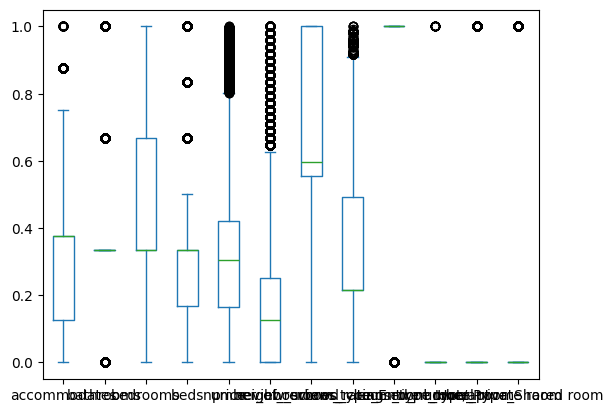

In [45]:
#Boxplot normalizado
df_main[num_cols].plot(kind='box');

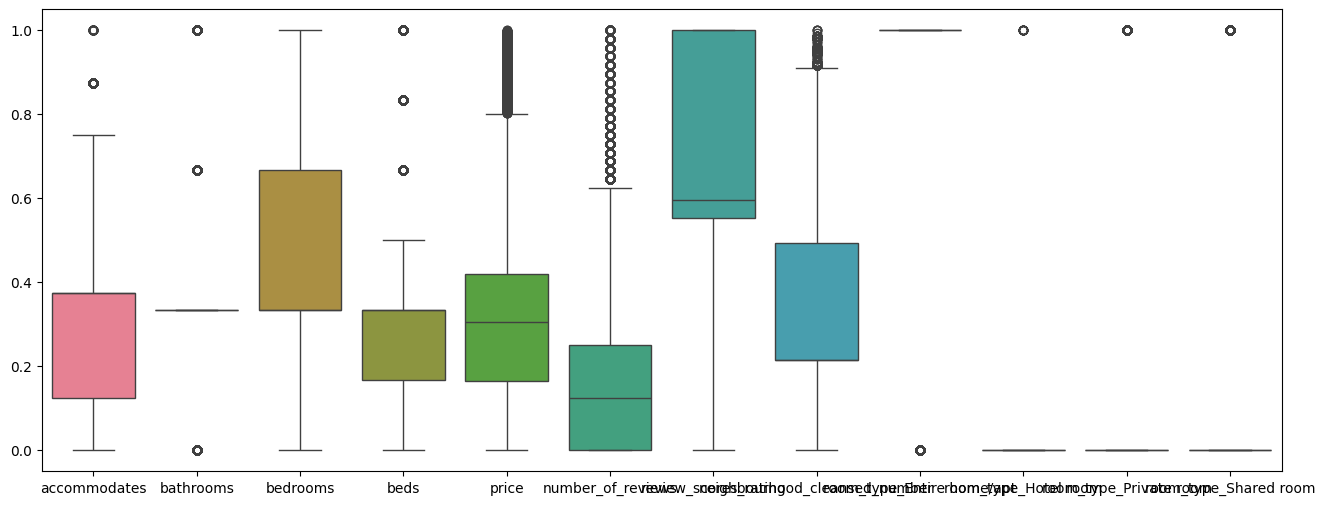

In [46]:
#Boxplot normalizado
plt.figure(figsize=(16,6))
ax = sns.boxplot(data= df_main[num_cols])

#6.Conferindo Resultado Final

In [47]:
#Verificação  das linhas iniciais
df_main.head()

,id,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,neighbourhood_cleansed_number,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,271975,0.375,0.333333,0.666667,0.333333,0.090991,0.125000,0.595238,0.944444,1.0,0.0,0.0,0.0
2,272631,0.125,0.333333,0.333333,0.333333,0.498879,0.666667,1.000000,0.215278,0.0,0.0,1.0,0.0
4,273363,0.000,0.333333,0.333333,0.166667,0.012550,0.104167,1.000000,0.784722,0.0,0.0,1.0,0.0
8,274116,0.250,0.333333,0.333333,0.333333,0.086060,1.000000,0.809524,0.784722,1.0,0.0,0.0,0.0
19,280625,0.250,0.666667,0.333333,0.166667,0.154191,0.125000,0.595238,0.090278,0.0,0.0,1.0,0.0


In [48]:
#Tipos de dados
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27741 entries, 0 to 39498
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             27741 non-null  int64  
 1   accommodates                   27741 non-null  float64
 2   bathrooms                      27741 non-null  float64
 3   bedrooms                       27741 non-null  float64
 4   beds                           27741 non-null  float64
 5   price                          27741 non-null  float64
 6   number_of_reviews              27741 non-null  float64
 7   review_scores_rating           27741 non-null  float64
 8   neighbourhood_cleansed_number  27741 non-null  float64
 9   room_type_Entire home/apt      27741 non-null  float64
 10  room_type_Hotel room           27741 non-null  float64
 11  room_type_Private room         27741 non-null  float64
 12  room_type_Shared room          27741 non-null  floa

In [49]:
#Reset de 'index'
df_main.reset_index(inplace=True, drop=True)

In [50]:
#Conferência dos dados estatísticos (normalizados)
df_main.describe()

,id,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,neighbourhood_cleansed_number,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
count,2.774100e+04,27741.000000,27741.000000,27741.000000,27741.000000,27741.000000,27741.000000,27741.000000,27741.000000,27741.000000,27741.000000,27741.000000,27741.000000
mean,7.689097e+17,0.314940,0.419752,0.456412,0.334042,0.319637,0.184383,0.707167,0.343474,0.767564,0.000577,0.225226,0.006633
std,5.023266e+17,0.193269,0.180183,0.222691,0.184727,0.205879,0.239557,0.240406,0.240190,0.422393,0.024009,0.417739,0.081173
min,6.166100e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.306519e+07,0.125000,0.333333,0.333333,0.166667,0.164500,0.000000,0.553118,0.215278,1.000000,0.000000,0.000000,0.000000
50%,9.901469e+17,0.375000,0.333333,0.333333,0.333333,0.305244,0.125000,0.595238,0.215278,1.000000,0.000000,0.000000,0.000000
75%,1.192295e+18,0.375000,0.333333,0.666667,0.333333,0.419543,0.250000,1.000000,0.493056,1.000000,0.000000,0.000000,0.000000
max,1.320520e+18,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
#Visualização das colunas
df_main.columns

Index(['id', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'number_of_reviews', 'review_scores_rating',
       'neighbourhood_cleansed_number', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object')

#7.Pipeline

In [52]:
def read_data(filename1, filename2):
  path = "/content/drive/MyDrive/Datasets_Modulos/Desafio_05/"
  df_main = pd.merge(pd.read_csv(path + filename1), pd.read_csv(path + filename2), how='left', on='id')
  return df_main

def basic_info(df):
  print("Dimensões (Linhas, Colunas)", df.shape)
  missing_values = df.isnull().sum()
  missing_values = missing_values[missing_values > 0]
  duplicated_values = df.duplicated()
  duplicated_values = duplicated_values[duplicated_values > 0]
  if missing_values.empty:
    print('Base sem dados faltantes.')
  else:
    print('Base com dados faltantes.')
    print(f"Colunas com dados faltantes\n{missing_values.index}")

  if duplicated_values.empty:
    print('Base sem dados duplicados.')
  else:
    print('Base com dados duplicados.')
    print(f"Linhas com dados duplicados\n{duplicated_values.index}")
  return df.dtypes

def null_hand(df):
  num_cols = df.select_dtypes(include='number').drop('id', axis=1).columns
  df = df.fillna(df[num_cols].median(), inplace=True)
  return df

def duplicated_hand(df):
  df = df.drop_duplicates()
  return df

def cols_types(df):
  int_cols = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'number_of_reviews']
  df[int_cols] = df[int_cols].astype(int)
  return df[int_cols]

def outliers(df):
  num_cols = df.select_dtypes(include='number').drop('id', axis=1).columns
  outliers_cols = [] #Lista de colunas indicadoras de outliers

  for col in num_cols: #Para cada coluna numérica
    Q1 = df[col].quantile(0.25) #Calcula o quartil 1
    Q3 = df[col].quantile(0.75) #Calcula o quartil 3
    IQR = Q3 - Q1 #Calcula o IQR
    LI = Q1 - 1.5*IQR #Determina o limite inferior
    LS = Q3 + 1.5*IQR #Determina o limite superior

    df['outliers_' + col] = ((df[col] < LI) | (df[col] > LS))
    outliers_cols.append('outliers_' + col)

  for col in outliers_cols:
    df = df[df[col] == False]
    df = df.drop(columns=col)

  return df

def label_encode_col(df, column_name):
  df[column_name + '_number'] = df[column_name].astype('category').cat.codes
  return df

def onehot_encode_col(df, column_name):
  df_dummies = pd.get_dummies(df[column_name], dtype=int, prefix='room_type')
  df = pd.concat([df.drop(columns=column_name, axis=1), df_dummies], axis=1)
  return df

def transform_cat_cols(df):
  label_encode_cols = ['neighbourhood_cleansed']
  onehot_encode_cols = ['room_type']

  for col in label_encode_cols:
    df = label_encode_col(df, col).drop(col, axis=1)

  for col in onehot_encode_cols:
    df = onehot_encode_col(df, col)
  return df

def normalize_column(df, column_name):
  df[column_name] = (df[column_name] - df[column_name].min()) / (df[column_name].max() - df[column_name].min())
  return df

def normalize(df):
  columns = df.select_dtypes(include='number').drop('id', axis=1).columns
  for col in columns:
    df = normalize_column(df, col)
  return df

def process(filename1, filename2):
  df = read_data(filename1, filename2)
  basic_info(df)
  missing_values = df.isnull().sum()
  missing_values = missing_values[missing_values > 0]
  duplicated_values = df.duplicated()
  duplicated_values = duplicated_values[duplicated_values > 0]
  if missing_values.any:
    null_hand(df)
  if duplicated_values.any:
    duplicated_hand(df)
  cols_types(df)
  df = outliers(df)
  df = transform_cat_cols(df)
  df = normalize(df)

  return df

In [53]:
pipe_test = process('listings_cleaned.csv', 'reviews.csv')

Dimensões (Linhas, Colunas) (39499, 10)
Base com dados faltantes.
Colunas com dados faltantes
Index(['bathrooms', 'bedrooms', 'beds', 'price', 'number_of_reviews',
       'review_scores_rating'],
      dtype='object')
Base sem dados duplicados.


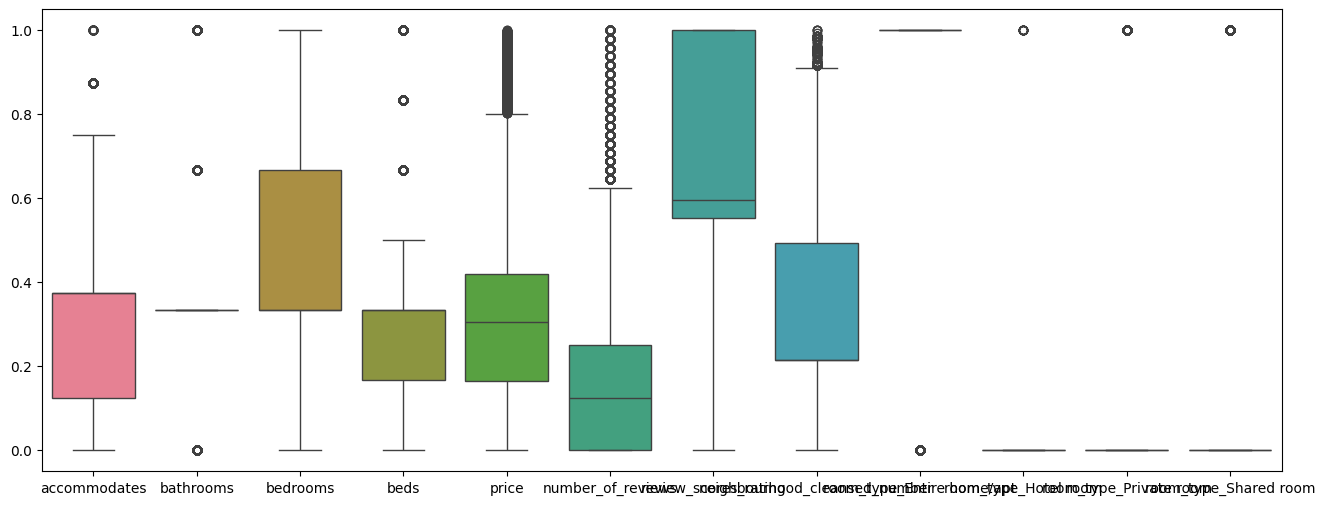

In [87]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(data= pipe_test.drop('id', axis=1))